In [3]:
import numpy as np
import math
import random
from matplotlib import pyplot as plt

## Параметры

In [4]:
# границы области
xp = 600
yp = 300
xm = 0
ym = 0

# количество абонентов
kolvo = 10

# задание объектов (препятствий)
Obj = []
for i in [75,200,325,450]:
    for j in [50,137,225]:
        Obj += [[i,i+75,j,j+25]]  # xlev, xprav, yniz, yverh

# ограничениия скорости
speedmin = 0.5
speedmax = 4
d = 10
t = 10

# ограничение по времени
maxtime = 500

## Вычисление расстояния от точки (x1,y1) до точки (x2,y2) по формуле Пифагора

In [5]:
def rast(x1,y1,x2,y2):
    '''
    x1, y1 - координаты первой точки
    x2, y2 - координаты второй точки
    '''
    return ((y1-y2)**2+(x1-x2)**2)**(1/2)

## Разыгрывание случайного положения или контрольной точки с учетом препятствий(точка не может быть внутри препятствия)

In [6]:
def randompoint(Obj,p,x,y):
    '''
    Obj - список препятвий
    p - флаг генерации контрольной точки (КТ)
    x, y - координаты абонентся при генерации координат новой КТ
    '''
    # положение задается равномерным распределением
    xr = np.random.randint(xm,xp)
    yr = np.random.randint(ym,yp)
    
    # проверка попадания в препятствия
    while True:
        s = 0
        for j in range(len(Obj)):
            while (xr>Obj[j][0] and xr<Obj[j][1] and yr>Obj[j][2] and yr<Obj[j][3]):
                # генерация новых координат в случае попадания в какое-либо препятствие
                xr = np.random.randint(xm,xp)
                yr = np.random.randint(ym,yp)
                s = s + 1
        
        # КТ не должна быть слишком близко
        if p == 1:
            while rast(x,y,xr,yr)<100:
                xr = np.random.randint(xm,xp)
                yr = np.random.randint(ym,yp)
                s = s + 1
        
        # условие завершения
        if s == 0:
            break
    
    return xr, yr

## Вычисление угла для обхода препятствия на пути к "контрольной" точке

In [7]:
def detourofobstacle(Obj,x,y,xb,yb,alf):
    '''
    Obj - список препятвий
    x, y - текущее положение абонента
    xb, yb - координаты КТ
    alf - текущий сгенерированный угол направления движения
    '''
    r1 = 1000000
    I = -1
    
    for i in range(len(Obj)):
        # уравнения прямых по 2-м точкам
        yl = y + (yb-y)*(Obj[i][0]-x)/(xb-x)
        yp = y + (yb-y)*(Obj[i][1]-x)/(xb-x)
        xn = x + (xb-x)*(Obj[i][2]-y)/(yb-y)
        xv = x + (xb-x)*(Obj[i][3]-y)/(yb-y)
        
        # проверки наличия препятвий между абонентом и КТ
        if (yl>Obj[i][2] and yl<Obj[i][3] and ((yl<y and yl>yb) or (yl>y and yl<yb))):
            r2 = rast(x,y,Obj[i][0],yl)
            if r2 < r1:
                r1 = r2
                x1 = Obj[i][0]
                y1 = yl
                I = i
        
        if (yp>Obj[i][2] and yp<Obj[i][3] and ((yp<y and yp>yb) or (yp>y and yp<yb))):
            r2 = rast(x,y,Obj[i][1],yl)
            if r2 < r1:
                r1 = r2
                x1 = Obj[i][1]
                y1 = yp
                I = i
        
        if (xn>Obj[i][0] and xn<Obj[i][1] and ((xn<x and xn>xb) or (xn>x and xn<xb))):
            r2 = rast(x,y,Obj[i][2],yl)
            if r2 < r1:
                r1 = r2
                x1 = xn
                y1 = Obj[i][2]
                I = i
        
        if (xv>Obj[i][0] and xv<Obj[i][1] and ((xv<x and xv>xb) or (xv>x and xv<xb))):
            r2 = rast(x,y,Obj[i][3],yl)
            if r2 < r1:
                r1 = r2
                x1 = xv
                y1 = Obj[i][3]
                I = i
    
    if I == -1:
        # препятсвий нет, угол остаётся тот же
        return alf
    else:
        # обнаружилось препятствие, изменяем угол
        if (x1 == Obj[I][0]) or (x1 == Obj[I][1]):
            xp1 = x1
            xp2 = x1
            yp1 = Obj[I][2]
            yp2 = Obj[I][3]
        
        if (y1 == Obj[I][2]) or (y1 == Obj[I][3]):
            yp1 = y1
            yp2 = y1
            xp1 = Obj[I][0]
            xp2 = Obj[I][1]
        
        if rast(xb,yb,xp1,yp1) < rast(xb,yb,xp2,yp2):
            x1 = xp1
            y1 = yp1
        else:
            x1 = xp2
            y1 = yp2
        
        if abs(x1-x) < 1:
            alf = (np.pi/2)*(y-y1)/abs(y-y1)
        else:
            if x < x1:
                if y < y1:
                    alf = math.atan(abs((y1-y)/(x1-x)))
                else:
                    alf = -math.atan(abs((y1-y)/(x1-x)))
            else:
                if y < y1:
                    alf = np.pi - math.atan(abs((y1-y)/(x1-x)))
                else:
                    alf = np.pi + math.atan(abs((y1-y)/(x1-x)))
    return alf

## функция для "плавного" отхода от препятствия

In [8]:
def obj_rast(x,y,alf,Obj,minR):
    alf0 = -10
    
    if ((abs(x-Obj[1])<minR) and (y>Obj[2]) and (y<Obj[3])):  #справа от объекта
        betta = 2*math.acos((x-Obj[1])/minR)
        alf0 = np.pi
    
    if ((abs(Obj[0]-x)<minR) and (y>Obj[2]) and (y<Obj[3])): #слева
        betta = 2*math.acos((Obj[0]-x)/minR)
        alf0 = 0
    
    if ((abs(Obj[2]-y)<minR) and (x>Obj[0]) and (x<Obj[1])): #снизу
        betta = 2*math.acos((Obj[2]-y)/minR)
        alf0 = np.pi/2
    
    if ((abs(y-Obj[3])<minR) and (x>Obj[0]) and (x<Obj[1])): #сверху
        betta = 2*math.acos((y-Obj[3])/minR)
        alf0 = 3*np.pi/2
    
    if ((x>Obj[1]) and (y>Obj[3]) and (rast(x,y,Obj[1],Obj[3])<minR)): #правый верхний угол
        x1 = Obj[1]
        y2 = Obj[3]
        x2 = x+(minR**2-(y2-y)**2)**(1/2)
        y1 = y+(minR**2-(x1-x)**2)**(1/2)
        betta = 2*math.asin((((y2-y1)**2+(x2-x1)**2)**(1/2))/(2*minR))
        alf0 = np.pi + math.atan((y-Obj[3])/(x-Obj[1]))
    
    if ((x>Obj[1]) and (y<Obj[2]) and (rast(x,y,Obj[1],Obj[2])<minR)): #правый нижний угол
        x1 = Obj[1]
        y2 = Obj[2]
        x2 = x+(minR**2-(y2-y)**2)**(1/2)
        y1 = y+(minR**2-(x1-x)**2)**(1/2)
        betta = 2*math.asin((((y2-y1)**2+(x2-x1)**2)**(1/2))/(2*minR))
        alf0 = np.pi/2 + math.atan((x-Obj[1])/(Obj[2]-y))
    
    if ((x<Obj[0]) and (y<Obj[2]) and (rast(x,y,Obj[0],Obj[2])<minR)): #левый нижний угол
        x1 = Obj[0]
        y2 = Obj[2]
        x2 = x+(minR**2-(y2-y)**2)**(1/2)
        y1 = y+(minR**2-(x1-x)**2)**(1/2)
        betta = 2*math.asin((((y2-y1)**2+(x2-x1)**2)**(1/2))/(2*minR))
        alf0 = math.atan((Obj[2]-y)/(Obj[0]-x))
    
    if ((x<Obj[0]) and (y>Obj[3]) and (rast(x,y,Obj[0],Obj[3])<minR)): #левый верхний угол
        x1 = Obj[0]
        y2 = Obj[3]
        x2 = x+(minR**2-(y2-y)**2)**(1/2)
        y1 = y+(minR**2-(x1-x)**2)**(1/2)
        betta = 2*math.asin((((y2-y1)**2+(x2-x1)**2)**(1/2))/(2*minR))
        alf0 = 3*np.pi/2 + math.atan((Obj[0]-x)/(y-Obj[3]))
    
    if alf0 == -10:
        return alf
    else:
        alf2 = random.normalvariate(0,np.pi/6)
        Alf = (alf + alf2)%(2*np.pi)
        
        if Alf < np.pi/2 and alf0 > 3*np.pi/2:
            Alf = Alf + 2*np.pi
        else:
            if Alf > 3*np.pi/2 and alf0 < np.pi/2:
                Alf = Alf - 2*np.pi
        
        while ((Alf < alf0 + betta/2) and (Alf > alf0 - betta/2)):
            Alf = Alf - alf2
            alf2 = random.normalvariate(0,np.pi/6)
            Alf = Alf + alf2
        
        return Alf

## Перевод счетчика времени в часы и минуты формата времени суток

In [9]:
def time(h_time1, m_time1, s_time1):
    if(s_time1 >= 60):
        m_time1 = m_time1+s_time1//60 # минуты*
        s_time1 = s_time1%60          # секунды
        
        if(m_time1 >= 60):
            h_time1 = h_time1+m_time1//60 # часы*
            m_time1 = m_time1%60          # минуты
            
            if(h_time1 >= 24):
                h_time1 = h_time1-24  # часы
    
    return h_time1, m_time1, s_time1

## Основная функция

In [10]:
def man(xp,yp,xm,ym,speedmin,speedmax,d,t,h,maxtime,kolvo,Obj):
    '''
    xp, yp, xm, ym - границы области
    speedmin, speedmax, d, t - ограничениия скорости
    h - "индикатор" выбора модели: "0" - фиксированное расстояние, "1" - фиксированное время
    maxtime - ограничение по времени
    kolvo - количество абонентов
    Obj - список препятвий
    '''
    
    XG = [0]
    YG = [0]
    T = [0]
    XB = [0]
    YB = [0]
    
    # начальное положение каждого абонента
    x0 = np.zeros((kolvo))
    y0 = np.zeros((kolvo))
    for i in range(1,kolvo):
        x0[i], y0[i] = randompoint(Obj,0,0,0)
    
    x0[0] = x0[1]
    y0[0] = y0[1]
    for i in range(kolvo-1):
        XG = XG+[0]
        YG = YG+[0]
        T = T+[0]
        XB = XB+[0]
        YB = YB+[0]
    
    for s in range(1,kolvo): # если без парного хождения первых двух, то убрать "1,"
        x = x0[s]
        y = y0[s]
        Xb = []
        Yb = []
        dp = 0        # сумма пройденного расстояния
        st = 0        # сумма пройденного времени
        xg = [x0[s]]  # массив иксов
        yg = [y0[s]]  # массив игреков
        
        if s == 1: # для расположения второго абонента вблизи первого для случая парного хождения
            xf = x0[s]+np.random.uniform(2,6)
            yf = y0[s]+np.random.uniform(2,6)
            Xb0 = []
            Yb0 = []
            xg0 = [xf]
            yg0 = [yf]
            ti0 = [0]
        
        ti = [0]
        h_time = 12    #начальное время, часы
        m_time = 0     #минуты
        s_time = 0     #секунды
        alf = np.random.uniform(-np.pi, np.pi)
        
        print('\n Абонент №', s+1, ':')
        
        xb, yb = randompoint(Obj,1,x,y)
        while(st<maxtime):
            v = np.random.uniform(speedmin, speedmax)  # получаем случайную скорость в пределах от 0.5 до 4 шага/с
            
            # "выбор" модели
            if(h==0):
                # фиксированная длина шага
                dt = d/v
                dl = d
            else:
                # фиксированное время шага
                dl = t*v
                dt = t
            minR = 1.5*dl  # параметр начала "плавного" обхода препятствия
            
            if abs(xb-x) < 1:  # (xb-x) - знаменатель дроби, не может быть = 0
                alf = (np.pi/2)*(y-yb)/abs(y-yb)
            else:
                if x<xb:
                    if y<yb:   # первая четверть
                        alf = math.atan(abs((yb-y)/(xb-x)))
                    else:      # четвертая четверть
                        alf = -math.atan(abs((yb-y)/(xb-x)))
                else:
                    if y<yb:   # вторая четверть
                        alf = np.pi-math.atan(abs((yb-y)/(xb-x)))
                    else:      # третья четверть
                        alf = np.pi+math.atan(abs((yb-y)/(xb-x)))
            
            alf2 = random.normalvariate(0,np.pi/18)  # sigma=pi/6 чтобы 3 сигма образовывал отрезок -пи/2 до пи/2
            alf=(alf+alf2)
            alf = detourofobstacle(Obj,x,y,xb,yb,alf)
            for o in range(len(Obj)):
                alf = obj_rast(x,y,alf,Obj[o],minR)  # обход объекта (при необходимости)

            st = st+dt
            if(st>maxtime):           # проверка суммарного пройденного времени
                dt = maxtime-(st-dt)  # если больше нашего maxtime, то берём только оставшееся до него время
                dl = dt*v
                st = maxtime
            dp = dp+dl
            s_time = s_time+dt
            h_time, m_time, s_time = time(h_time, m_time, s_time)
            
            x_prev = x
            y_prev = y
            x = x_prev + dl * np.cos(alf)
            y = y_prev + dl * np.sin(alf)
            if s == 1:
                x_prev = xf
                y_prev = yf
                xf = x_prev + dl * np.cos(alf+np.random.uniform(-np.pi/36,np.pi/36))
                yf = y_prev + dl * np.sin(alf+np.random.uniform(-np.pi/36,np.pi/36))
                xg0.append(xf)
                yg0.append(yf)
                ti0.append(st)
            
            xg.append(x)    # добавление новых иксов в конец массива
            yg.append(y)    # добавление новых игреков в конец массива
            ti.append(st)   # запись времени
            print(h_time,':',m_time,':',s_time,'Прошел всего',dp)
            
            if (xb-x)**2+(yb-y)**2<225:
                print('Я дошел до точки ('+str(xb)+';'+str(yb)+')')
                wt = np.random.randint(1,10)   # пауза от 1 до 10 сеукнд
                st = st + wt
                
                if(st > maxtime):
                    wt = maxtime-(st-wt)
                    st = maxtime
                
                s_time = s_time+wt
                h_time, m_time, s_time = time(h_time, m_time, s_time)
                xg.append(x)
                yg.append(y)
                ti.append(st)
                
                if s == 1:
                    xg0.append(xf)
                    yg0.append(yf)
                    ti0.append(st)
                
                Xb.append(xb)
                Yb.append(yb)
                xb, yb = randompoint(Obj,1,x,y)
                print(h_time,':',m_time,':',s_time,' Я выбрал новую точку, теперь иду к ('+str(xb)+';'+str(yb)+')')
            
            if(st >= maxtime):           # завершение хождения из-за превышения максимального времени
                Xb.append(xb)
                Yb.append(yb)
                print('Я уже прошел', st, 'секунд')
                
                XG[s] = xg
                YG[s] = yg
                T[s] = ti
                XB[s] = Xb
                YB[s] = Yb
                if s == 1 :
                    XG[0] = xg0
                    YG[0] = yg0
                    T[0] = ti0
                    XB[0] = Xb
                    YB[0] = Yb
    
    return XG,YG,T, XB, YB

## Проверка наличия препятствия между МУ (для учета в расчете SIR)

In [11]:
def checklets(x1,y1,x2,y2,Obj):
    for i in range(len(Obj)):
        # уравнения прямых по 2-м точкам
        yl = y1+(y2-y1)*(Obj[i][0]-x1)/(x2-x1)
        yp = y1+(y2-y1)*(Obj[i][1]-x1)/(x2-x1)
        xn = x1+(x2-x1)*(Obj[i][2]-y1)/(y2-y1)
        xv = x1+(x2-x1)*(Obj[i][3]-y1)/(y2-y1)
        
        if((yl>Obj[i][2] and yl<Obj[i][3]) 
           or (yp>Obj[i][2] and yp<Obj[i][3]) 
           or (xv>Obj[i][0] and xv<Obj[i][1]) 
           or (xn>Obj[i][0] and xn<Obj[i][1])):
            return True
    return False

## Вычиисление SIR на заданной паре

In [12]:
def SIRfunction(I,J,XG,YG,T,Obj,time0,kolvo):
    '''
    I - абонент-передатчик
    J - абонент-приёмник
    XG, YG - матрицы изменений координат абонентов (в случае фиксированной длины шага списки у абонентов могут отличаться по длине)
    T - матрица изменений времени соответствующая XG,YG
    Obj - список препятвий
    time0 - интересующий момент модельного времени
    kolvo - количество абонентов
    '''
    if(time0>maxtime):
        print('Вы ввели недопустимое время, время '+str(time0)+' не достигалось')
    else:
        xr = np.zeros(kolvo)
        yr = np.zeros(kolvo)
        arr = np.zeros(kolvo)
        for j in range(kolvo):          
            for i in range(len(XG[j])-1):
                if((T[j][i]<=time0)and(T[j][i+1]>time0)):
                    break
            xr[j] = XG[j][i]+(XG[j][i+1]-XG[j][i])*(time0-T[j][i])/(T[j][i+1]-T[j][i])
            yr[j] = YG[j][i]+(YG[j][i+1]-YG[j][i])*(time0-T[j][i])/(T[j][i+1]-T[j][i])        
        for i in range(kolvo):
            arr[i] = rast(xr[i],yr[i],xr[J],yr[J])

        g = np.zeros(kolvo)
        gamma = np.zeros(kolvo)
        for i in range(kolvo):
            if i != J:
                g[i] = 23
                gamma[i] = 2
                if checklets(xr[i],yr[i],xr[J],yr[J],Obj):
                    gamma[i] = 4
        znam = 0
        for k in range(kolvo):
            if (k!=I and k!=J):
                znam = znam + g[k]*(arr[k])**(-gamma[k])
        return g[I]*(arr[I])**(-gamma[I])/znam

## Вычисление положений МУ в момент времени time0

In [13]:
def polojenie(XG,YG,T,time0):
    '''
    XG, YG - матрицы изменений координат абонентов (в случае фиксированной длины шага списки у абонентов могут отличаться по длине)
    T - матрица изменений времени соответствующая XG,YG
    time0 - интересующий момент модельного времени
    '''
    if(time0 > maxtime):
        print('Вы ввели недопустимое время, время '+str(time0)+' не достигалось')
    else:
        xr = np.zeros(kolvo)
        yr = np.zeros(kolvo)
        
        for j in range(kolvo):          
            for i in range(len(XG[j])-1):
                if((T[j][i]<=time0)and(T[j][i+1]>time0)):  # введенное время может не совпадать с шагами модели
                    break
            xr[j] = XG[j][i]+(XG[j][i+1]-XG[j][i])*(time0-T[j][i])/(T[j][i+1]-T[j][i])  #что-то не так(возможно)
            yr[j] = YG[j][i]+(YG[j][i+1]-YG[j][i])*(time0-T[j][i])/(T[j][i+1]-T[j][i])
            plt.scatter(xr[j],yr[j],label =str(j+1))
        
        plt.title('Положения абонентов в момент времени = '+str(time0))
        plt.legend(loc='upper right')
        for i in range(len(Obj)):
            plt.plot([Obj[i][0],Obj[i][0]],[Obj[i][2],Obj[i][3]], 'r')
            plt.plot([Obj[i][1],Obj[i][1]],[Obj[i][2],Obj[i][3]], 'r')
            plt.plot([Obj[i][0],Obj[i][1]],[Obj[i][2],Obj[i][2]], 'r')
            plt.plot([Obj[i][0],Obj[i][1]],[Obj[i][3],Obj[i][3]], 'r')
        plt.plot([xp,xp],[yp,ym],color = 'black')
        plt.xlim([xm,xp+100])
        plt.ylim([ym,yp])
        plt.show()

## Запуск симуляции

In [14]:
XG, YG, T, XB2, YB2 = man(xp,yp,xm,ym,speedmin,speedmax,d,t,0,maxtime,kolvo,Obj)


 Абонент № 2 :
12 : 0 : 3.2110256656513316 Прошел всего 10
12 : 0 : 10.034492786186092 Прошел всего 20
12 : 0 : 12.96640073562384 Прошел всего 30
12 : 0 : 16.850820504316637 Прошел всего 40
12 : 0 : 19.856357323218514 Прошел всего 50
12 : 0 : 27.466944805644793 Прошел всего 60
12 : 0 : 30.816176627410186 Прошел всего 70
12 : 0 : 39.652140724465 Прошел всего 80
12 : 0 : 45.9931849325656 Прошел всего 90
12 : 0 : 50.1886421257044 Прошел всего 100
12 : 0 : 54.979999529844 Прошел всего 110
12 : 1.0 : 3.35819476023201 Прошел всего 120
12 : 1.0 : 7.445917336399331 Прошел всего 130
12 : 1.0 : 10.17407313054099 Прошел всего 140
12 : 1.0 : 15.856911410500349 Прошел всего 150
12 : 1.0 : 20.074629720810613 Прошел всего 160
12 : 1.0 : 36.97585982194502 Прошел всего 170
12 : 1.0 : 39.65826032804593 Прошел всего 180
12 : 1.0 : 46.16436978435935 Прошел всего 190
12 : 1.0 : 48.75196656691441 Прошел всего 200
12 : 1.0 : 53.831370110291004 Прошел всего 210
12 : 1.0 : 59.29282823902319 Прошел всего 220
1

12 : 2.0 : 19.429728907018735 Прошел всего 250
12 : 2.0 : 22.038099407904593 Прошел всего 260
12 : 2.0 : 25.33464763916416 Прошел всего 270
12 : 2.0 : 31.593593277719805 Прошел всего 280
12 : 2.0 : 35.2236047274557 Прошел всего 290
12 : 2.0 : 39.9696990043348 Прошел всего 300
12 : 2.0 : 43.38145648550753 Прошел всего 310
12 : 2.0 : 46.4796164321853 Прошел всего 320
12 : 2.0 : 50.04011109966725 Прошел всего 330
12 : 3.0 : 0.32620513358779846 Прошел всего 340
12 : 3.0 : 4.479676347858347 Прошел всего 350
12 : 3.0 : 7.037131520639264 Прошел всего 360
12 : 3.0 : 11.739099859823735 Прошел всего 370
12 : 3.0 : 20.6167951473803 Прошел всего 380
12 : 3.0 : 23.930370693701963 Прошел всего 390
12 : 3.0 : 26.61110723721859 Прошел всего 400
12 : 3.0 : 33.39522385904006 Прошел всего 410
12 : 3.0 : 38.555909676412156 Прошел всего 420
12 : 3.0 : 42.45605620704101 Прошел всего 430
12 : 3.0 : 46.174706425521585 Прошел всего 440
12 : 3.0 : 49.7509554013991 Прошел всего 450
12 : 3.0 : 52.40904739266695 П

12 : 1.0 : 37.54997535723537 Прошел всего 170
12 : 1.0 : 45.31552557898881 Прошел всего 180
12 : 1.0 : 47.82523680936797 Прошел всего 190
12 : 1.0 : 50.80753783682992 Прошел всего 200
12 : 1.0 : 55.236500300061564 Прошел всего 210
12 : 1.0 : 57.88542907702942 Прошел всего 220
12 : 2.0 : 2.4850155822469944 Прошел всего 230
12 : 2.0 : 10.084130047384205 Прошел всего 240
12 : 2.0 : 12.914157043379769 Прошел всего 250
12 : 2.0 : 16.399324323135893 Прошел всего 260
12 : 2.0 : 32.12427836557291 Прошел всего 270
12 : 2.0 : 35.428460971830255 Прошел всего 280
12 : 2.0 : 38.98703715032125 Прошел всего 290
12 : 2.0 : 41.96494344598144 Прошел всего 300
12 : 2.0 : 45.22139561949673 Прошел всего 310
12 : 3.0 : 2.251609933731771 Прошел всего 320
12 : 3.0 : 4.862683578693471 Прошел всего 330
12 : 3.0 : 9.816863447130123 Прошел всего 340
12 : 3.0 : 12.425428652088952 Прошел всего 350
12 : 3.0 : 17.458363199930663 Прошел всего 360
12 : 3.0 : 22.270972172132776 Прошел всего 370
12 : 3.0 : 25.47912053086

12 : 0 : 30.700803397139467 Прошел всего 60
12 : 0 : 33.52580864993143 Прошел всего 70
12 : 0 : 36.71323784550086 Прошел всего 80
12 : 0 : 40.02421980881282 Прошел всего 90
12 : 0 : 42.86641324807058 Прошел всего 100
12 : 0 : 51.823547409601254 Прошел всего 110
Я дошел до точки (292;111)
12 : 1.0 : 0.8235474096012538  Я выбрал новую точку, теперь иду к (534;180)
12 : 1.0 : 15.09469321731813 Прошел всего 120
12 : 1.0 : 17.7744705749425 Прошел всего 130
12 : 1.0 : 23.526185061163964 Прошел всего 140
12 : 1.0 : 28.45808373630253 Прошел всего 150
12 : 1.0 : 33.329927551684875 Прошел всего 160
12 : 1.0 : 38.80428948888988 Прошел всего 170
12 : 1.0 : 42.69615901844803 Прошел всего 180
12 : 1.0 : 47.322122617768464 Прошел всего 190
12 : 1.0 : 50.07909928324782 Прошел всего 200
12 : 1.0 : 55.36164624055489 Прошел всего 210
12 : 2.0 : 9.666163687237628 Прошел всего 220
12 : 2.0 : 18.314677286689637 Прошел всего 230
12 : 2.0 : 21.222230728750272 Прошел всего 240
12 : 2.0 : 29.997560329818626 Про

## Отображение смоделированных траекторий

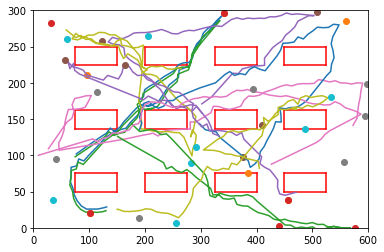

In [15]:
# изображение препятствий
for i in range(len(Obj)): 
    plt.plot([Obj[i][0],Obj[i][0]],[Obj[i][2],Obj[i][3]], 'r')
    plt.plot([Obj[i][1],Obj[i][1]],[Obj[i][2],Obj[i][3]], 'r')
    plt.plot([Obj[i][0],Obj[i][1]],[Obj[i][2],Obj[i][2]], 'r')
    plt.plot([Obj[i][0],Obj[i][1]],[Obj[i][3],Obj[i][3]], 'r')

# абоненты
for s in range(kolvo):
    plt.plot(XG[s],YG[s])       # траектории
    plt.plot(XB2[s],YB2[s],'o') # контрольные точки

plt.xlim([xm,xp]) # ограничения области(для вывода целиком(чтобы не приближало))
plt.ylim([ym,yp])
plt.show()

## SIR

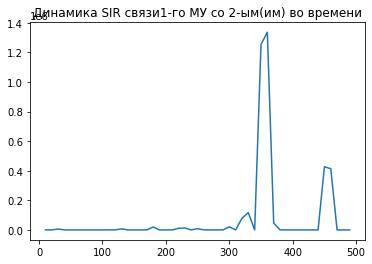


 Положение абонентов в момент максимума значения SIR (SIR=1336805.3665196393, SIRdb=61.26068180336254) связи 1-го МУ со 2-ым(им)


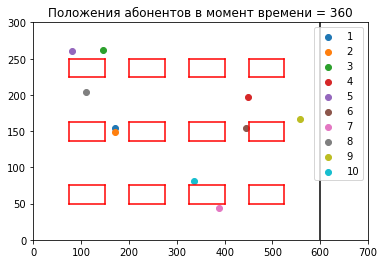


 Положение абонентов в момент минимума значения SIR (SIR=1.077523290108512, SIRdb=0.3242666598478428) связи 1-го МУ со 2-ым(им)


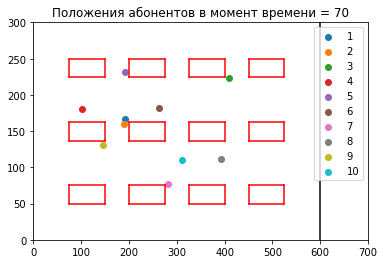

In [16]:
sumSIR = 0
forgraph1 = []
forgraph2 = []
time = t  # шаг по времени графика динамики SIR
I = 0     # номер абонента "передатчика"(номера от 0 до N-1)
J = 1     # номер абонента "приёмника"
max1 = 0
min1 = 100
while time < maxtime:
    SIR = SIRfunction(I,J,XG,YG,T,Obj,time,kolvo)
    forgraph1.append(time)
    forgraph2.append(SIR)
    if SIR > max1:
        max1 = SIR
        timeofmax = time
    if SIR < min1:
        min1 = SIR
        timeofmin = time
    sumSIR = sumSIR + SIR
    time = time + t

plt.plot(forgraph1,forgraph2)
plt.title('Динамика SIR связи'+str(I+1)+'-го МУ со '+str(J+1)+'-ым(им) во времени')
plt.show()

# положения абонентов в моменты максимума и минимума значений SIR
print('\n Положение абонентов в момент максимума значения SIR (SIR='+str(max1)+', SIRdb='+str(10*np.log10(max1))+') связи '+str(I+1)+'-го МУ со '+str(J+1)+'-ым(им)')
polojenie(XG,YG,T,timeofmax)

print('\n Положение абонентов в момент минимума значения SIR (SIR='+str(min1)+', SIRdb='+str(10*np.log10(min1))+') связи '+str(I+1)+'-го МУ со '+str(J+1)+'-ым(им)')
polojenie(XG,YG,T,timeofmin)